# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
run_dir = '../../run'
file  = 'observation_columnSpinup.dat'

# Obtain Data

In [4]:
keys = ['control', 'prec-hi-var', 'prec-lo-var', 'temp-hi-var', 'temp-lo-var']
labels = ['Control', 'HPV', 'LPV', 'HTV', 'LTV']
colors = ['black', 'blue', 'green', 'blue', 'green']
line_styles = ['-', '--', '--', ':', ':']
run_dict = {}
for key in keys:
    file_path = run_dir + f'/column_spinup_imnavait_ws_2011_2020_ABoVE_DAAC_snow_rain_KT_6-{key}/' + file
    df = pd.read_csv(file_path, comment='#')
    df['surface temperature [degC]'] = df['surface temperature [K]'] - 273.15
    df['Date'] = pd.to_datetime(df['time [d]'], unit='d', origin='2011-01-01')
    df = df.set_index('Date')
    run_dict[key] = df

In [5]:
run_dict['control'].head()

,time [d],water content [mol],surface water content [mol],snow water content [mol],snow depth [m],snow density [kg/m^3],evaporation rate [m/d],evaporation cumulation [m3/d],subsurface evaporation cumulation [m3/d],discharge cumulation [mol/d],...,snow cumulation [m3SWE/d],molar density liquid [mol m^-3],surface area [m^2],snow melt [m/d],surface temperature [K],air temperature [K],thaw depth [m],water table depth [m],net runoff [mol/d],surface temperature [degC]
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.0,962031.806673,2859.918540,1664.690062,0.300000,100.000000,0.000000,0.000000,0.0,0.0,...,0.000000,55489.668728,1.0,0.0,269.865604,248.893875,0.0,0.0,0.0,-3.284396
2011-01-02,1.0,962025.665239,2866.059974,1707.165416,0.307624,100.000000,0.000141,0.000141,0.0,0.0,...,0.000903,55495.254705,1.0,0.0,270.843416,262.054260,0.0,0.0,0.0,-2.306584
2011-01-03,2.0,962020.608161,2871.117052,1715.864450,0.251924,122.727563,-0.000009,-0.000009,0.0,0.0,...,0.000147,55497.217190,1.0,0.0,271.250683,267.914551,0.0,0.0,0.0,-1.899317
2011-01-04,3.0,962015.981858,2875.743355,1725.413096,0.224450,138.515887,-0.000169,-0.000169,0.0,0.0,...,0.000003,55497.572843,1.0,0.0,271.329484,265.272522,0.0,0.0,0.0,-1.820516
2011-01-05,4.0,962010.991337,2880.733875,1744.748717,0.208763,150.595139,-0.000197,-0.000197,0.0,0.0,...,0.000152,55496.918497,1.0,0.0,271.185779,261.996765,0.0,0.0,0.0,-1.964221


In [6]:
run_dict['control'].columns

Index(['time [d]', 'water content [mol]', 'surface water content [mol]',
       'snow water content [mol]', 'snow depth [m]', 'snow density [kg/m^3]',
       'evaporation rate [m/d]', 'evaporation cumulation [m3/d]',
       'subsurface evaporation cumulation [m3/d]',
       'discharge cumulation [mol/d]',
       'surface-subsurface exchange cumulation [mol/d]', 'snowmelt rate [m/d]',
       'snowmelt cumulation [m3/d]', 'rain [m/d]', 'rain cumulation [m3/d]',
       'snow [mSWE/d]', 'snow cumulation [m3SWE/d]',
       'molar density liquid [mol m^-3]', 'surface area [m^2]',
       'snow melt [m/d]', 'surface temperature [K]', 'air temperature [K]',
       'thaw depth [m]', 'water table depth [m]', 'net runoff [mol/d]',
       'surface temperature [degC]'],
      dtype='object')

# Make Plot Data

## Plot Entire Time Series

In [17]:
%matplotlib widget

In [18]:
def plot_entire_timeseries(variable):
    fig = plt.figure(figsize=(13, 5.6))
    ax = fig.add_subplot(111)
    for (key, df), color, ls in zip(run_dict.items(), colors, line_styles):
        ax.plot(df.index, df[variable], color=color, ls=ls, label=key)
    ax.set_xlim(df.index.min(), df.index.max())
    ax.legend()
    fig.tight_layout()

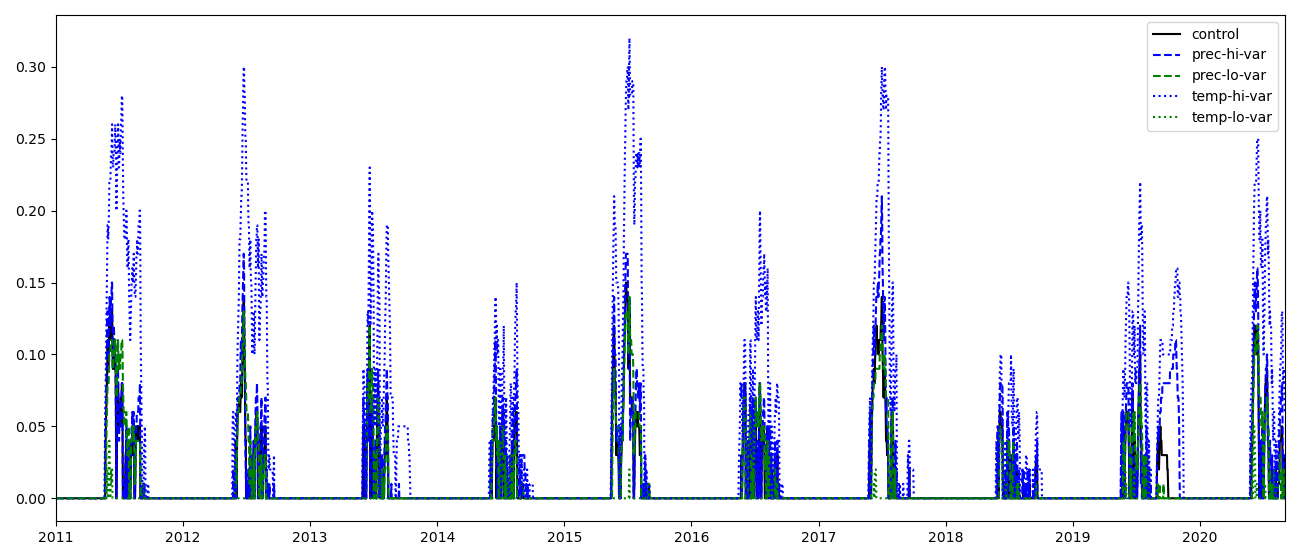

In [19]:
plot_entire_timeseries('water table depth [m]')

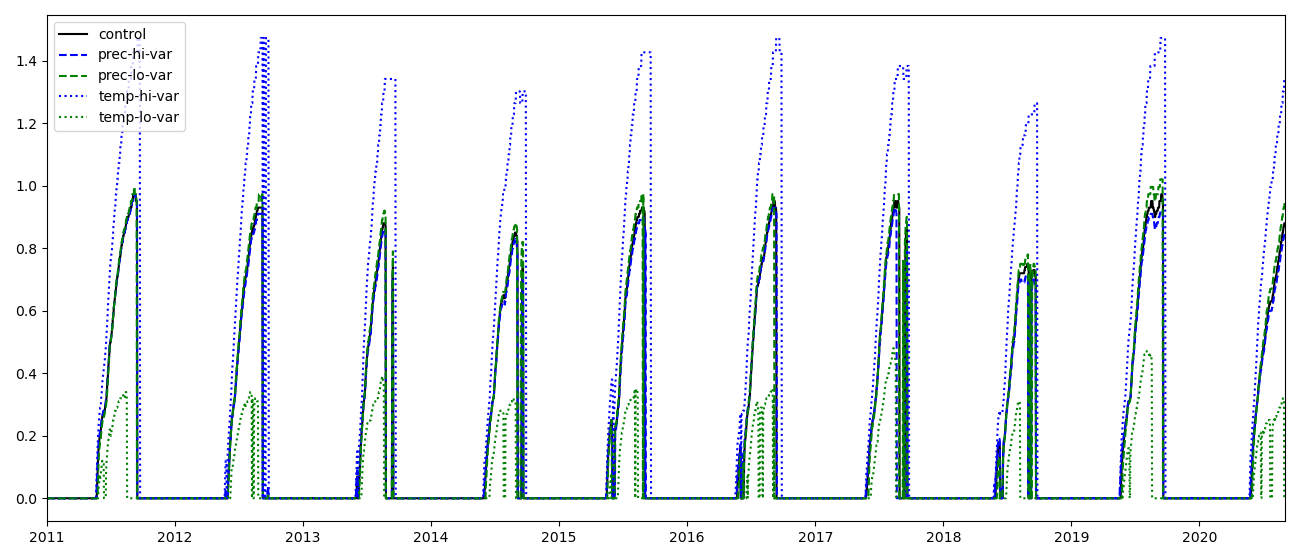

In [20]:
plot_entire_timeseries('thaw depth [m]')

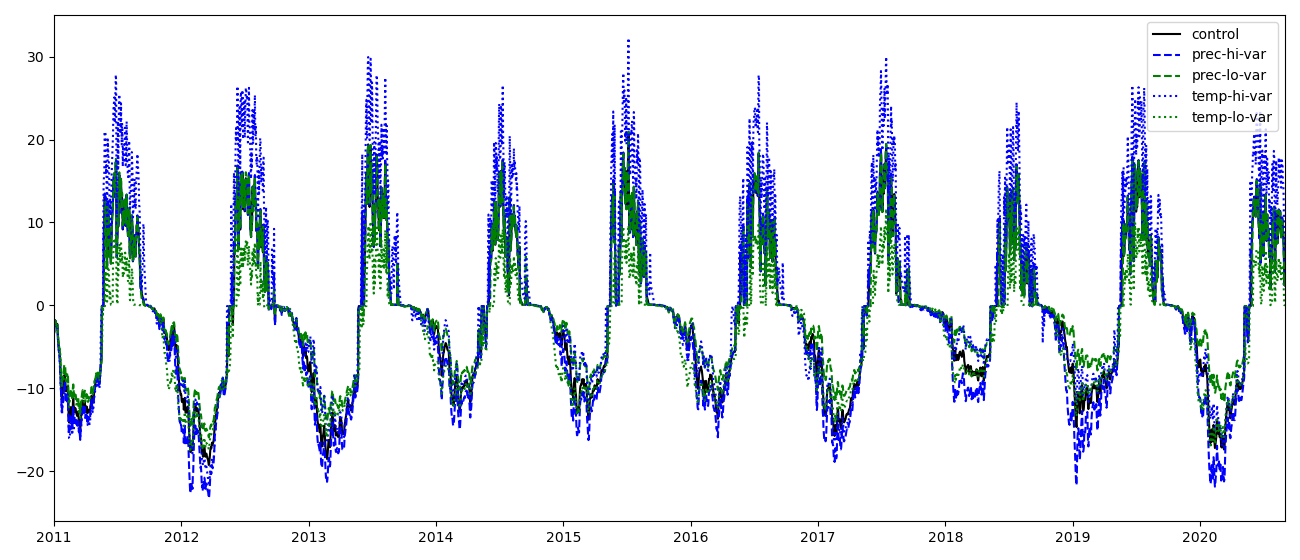

In [21]:
plot_entire_timeseries('surface temperature [degC]')

## Plot One Year

In [22]:
%matplotlib inline

In [26]:
def plot_year_timeseries(variable, year):
    fig = plt.figure(figsize=(6.5, 4))
    ax = fig.add_subplot(111)
    for (key, df), color, ls, label in zip(run_dict.items(), colors, line_styles, labels):
        df = df[df.index.year == year]
        ax.plot(df.index, df[variable], color=color, ls=ls, label=label)
    ax.set_xlim(df.index.min(), df.index.max())
    ax.set_ylabel(variable)
    if 'depth' in variable:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color='gray', alpha=1, lw=0.5)
    ax.legend()

    # Use concise date formatter for x-axis
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    
    # Change font properties
    ax.set_ylabel(variable, fontsize=10)
    ax.tick_params(axis='y', labelsize=10, labelrotation=0)
    # for label in ax.get_yticklabels():
    #     label.set_fontname('Arial')
    ax.legend(prop={'size': 10})
    
    fig.tight_layout()

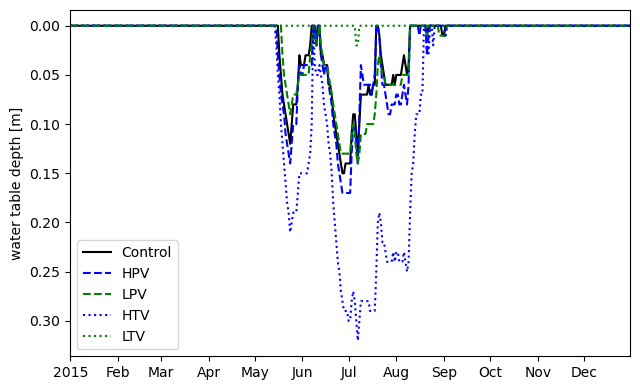

In [27]:
plot_year_timeseries('water table depth [m]', 2015)

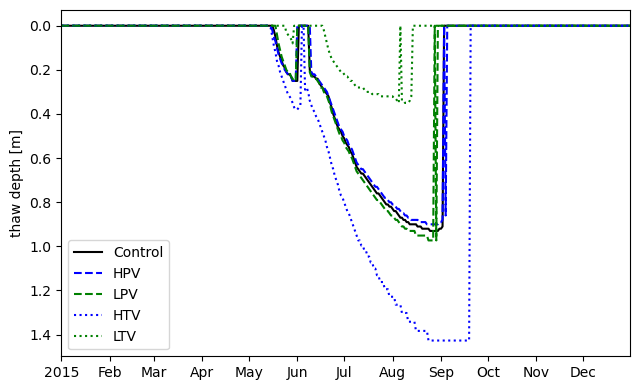

In [28]:
plot_year_timeseries('thaw depth [m]', 2015)

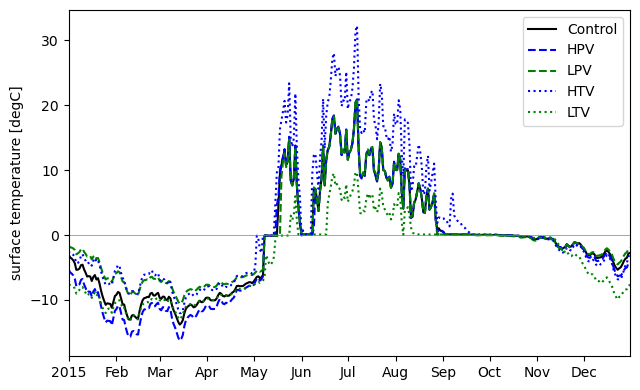

In [29]:
plot_year_timeseries('surface temperature [degC]', 2015)